In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from astropy import units as u
import astropy.coordinates as coord

In [2]:
dir = 'D:/pzivi/Research/Gurtina_Project/'


#### Set assumed center coordinates for the SMC
#### Then transform into Galactocentric frame

smcra, smcdec, smcdist, smcpmra, smcpmdec, smcvrad = 13.04, -73.10, 60.6, 0.67, -1.20, 148.0

c = coord.SkyCoord(ra=smcra*u.degree, dec=smcdec*u.degree, distance=smcdist*u.kpc, \
                   pm_ra_cosdec=smcpmra*u.mas/u.yr, pm_dec=smcpmdec*u.mas/u.yr, \
                   radial_velocity=smcvrad*u.km/u.s, frame='icrs')

print(c.transform_to(coord.Galactocentric(galcen_distance=8.1*u.kpc))) 

c2 = c.transform_to(coord.Galactocentric(galcen_distance=8.1*u.kpc))

smc_center = np.asarray([c2.x.value, c2.y.value, c2.z.value, c2.v_x.value, c2.v_y.value, c2.v_z.value])

print(smc_center)
print(np.sqrt(smc_center[0]**2 + smc_center[1]**2 + smc_center[2]**2))
print(np.sqrt(smc_center[3]**2 + smc_center[4]**2 + smc_center[5]**2))


#### Check that it works going back the other way

test = coord.SkyCoord(x = smc_center[0] * u.kpc, y = smc_center[1] * u.kpc, z = smc_center[2] * u.kpc, \
                       v_x = smc_center[3] * u.km/u.s, v_y = smc_center[4] * u.km/u.s, \
                       v_z = smc_center[5] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
testb = test.transform_to(coord.ICRS)

print(testb)

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (15.43241556, -36.60024474, -42.15749726)
 (v_x, v_y, v_z) in km / s
    (40.73769469, -149.18103604, 153.24272356)>
[  15.43241556  -36.60024474  -42.15749726   40.73769469 -149.18103604
  153.24272356]
57.92229225678382
217.71052709001808
<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (13.04, -73.1, 60.6)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (0.67, -1.2, 148.)>


In [5]:
# Load in Model 2 Future 40 data

smcf40filebase = dir + 'Data/SMC_Model2_F40/SMC_' 

####

smcf40_new = np.loadtxt(smcf40filebase+'NewStars_Model2_Future40.txt')

smcf40age_new = np.loadtxt(smcf40filebase + 'NewStars_Model2_Future40_Ages.txt')
smcf40age_new.shape = (len(smcf40age_new), 1)

####

smcf40_old = np.loadtxt(smcf40filebase+'OldStars_Model2_Future40.txt')

smcf40age_old = np.full((len(smcf40age_old), 1), 6040.0)


# smc1pos = np.loadtxt(smc1filebase + 'Pos_Model1_orig.txt')
# smc1vel = np.loadtxt(smc1filebase + 'Vel_Model1_orig.txt')

# smc1_orig = np.hstack((smc1age, smc1pos, smc1vel))

# smc1 = Table(data=smc1_orig, names=['Age', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


# smc1gaspos = np.loadtxt(dir + "Data/SMC_Model1/SMC_Gas_Pos_Model1_orig.txt")
# smc1gasvel = np.loadtxt(dir + "Data/SMC_Model1/SMC_Gas_Vel_Model1_orig.txt")

# smc1gas_orig = np.hstack((smc1gaspos, smc1gasvel))
# smc1gas = Table(data=smc1gas_orig, names=['X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


# smc1dm_orig = np.loadtxt(dir + "Data/SMC_DM_Model1.txt")
# smc1dm = Table(data=smc1dm_orig, names=['Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])

# smc1_center = np.asarray([18.0, -45.7, -40.0, -87.8, -384.0, 245.6])
# x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5


# ####

# def add_initial_columns(table, shift1, shift2):
#     x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5
    
#     try:
#         table.add_column((table['X_sim'] - shift1[x]), name='X_0')
#         table.add_column((table['Y_sim'] - shift1[y]), name='Y_0')
#         table.add_column((table['Z_sim'] - shift1[z]), name='Z_0')
#         table.add_column((table['Vx_sim'] - shift1[vx]), name='Vx_0')
#         table.add_column((table['Vy_sim'] - shift1[vy]), name='Vy_0')
#         table.add_column((table['Vz_sim'] - shift1[vz]), name='Vz_0')
        
#         table.add_column((table['X_0'] + shift2[x]), name='X_G')
#         table.add_column((table['Y_0'] + shift2[y]), name='Y_G')
#         table.add_column((table['Z_0'] + shift2[z]), name='Z_G')
#         table.add_column((table['Vx_0'] + shift2[vx]), name='Vx_G')
#         table.add_column((table['Vy_0'] + shift2[vy]), name='Vy_G')
#         table.add_column((table['Vz_0'] + shift2[vz]), name='Vz_G')
        
#     except ValueError:
#         print("You already added these columns.")
        
#     return table
        
# smc1 = add_initial_columns(smc1, smc1_center, smc_center)




# plt.clf()
# fig, ax = plt.subplots(figsize=(10,10))

# ax.scatter(smc1['X_0'], smc1['Y_0'], s=2, marker='.', color='black')
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# plt.show()


# plt.clf()
# fig, ax = plt.subplots(figsize=(10,10))

# ax.scatter(smc1['Vx_0'], smc1['Vy_0'], s=2, marker='.', color='black')
# ax.set_xlim(-50, 50)
# ax.set_ylim(-50, 50)
# ax.set_xlabel("Vx")
# ax.set_ylabel("Vy")
# plt.show()


# ####

# smc1gas = add_initial_columns(smc1gas, smc1_center, smc_center)

# smc1dm = add_initial_columns(smc1dm, smc1_center, smc_center)

104042 104042


The different lengths are: 
191837 174270 5903


<Figure size 432x288 with 0 Axes>

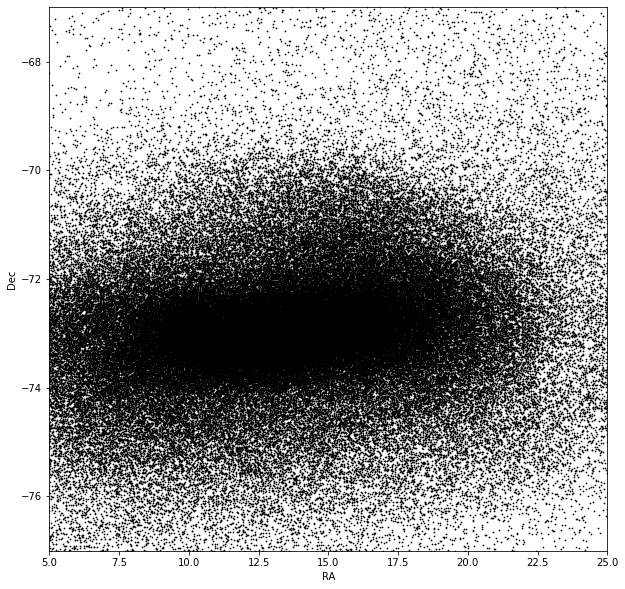

<Figure size 432x288 with 0 Axes>

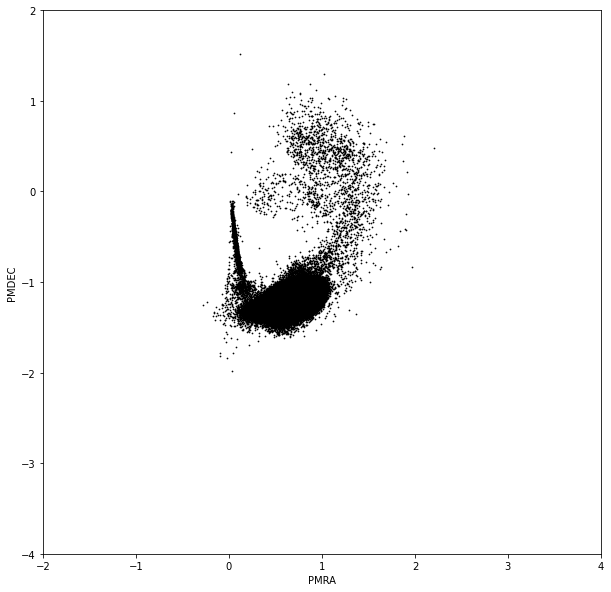

<Figure size 432x288 with 0 Axes>

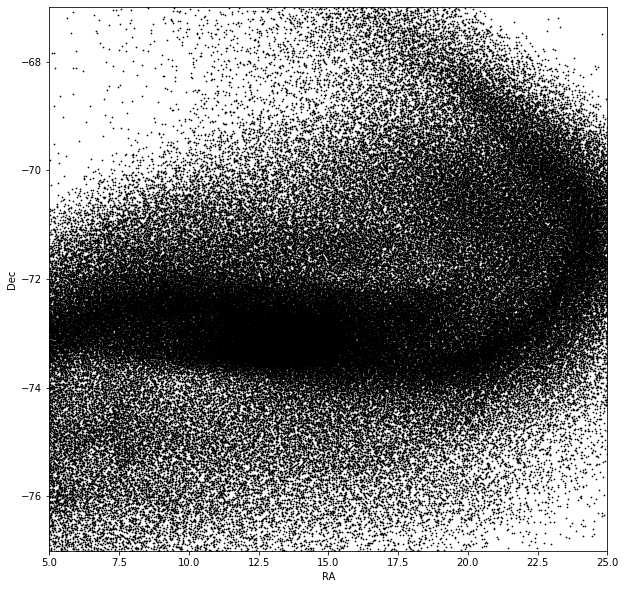

<Figure size 432x288 with 0 Axes>

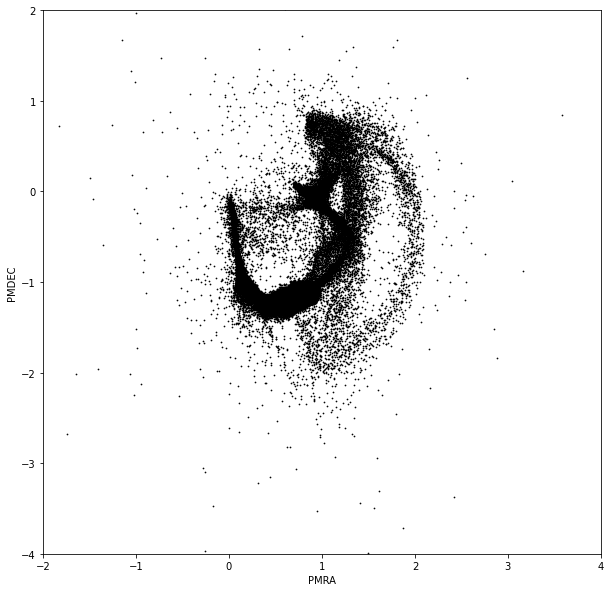

In [4]:
temp1a = coord.SkyCoord(x = smc1['X_G'] * u.kpc, y = smc1['Y_G'] * u.kpc, z = smc1['Z_G'] * u.kpc, \
                       v_x = smc1['Vx_G'] * u.km/u.s, v_y = smc1['Vy_G'] * u.km/u.s, \
                       v_z = smc1['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1b = temp1a.transform_to(coord.ICRS)

####

def add_wcs_columns(table, wcsvals):
    try:
        table.add_column(wcsvals.ra.value, name='RA')
        table.add_column(wcsvals.dec.value, name='DEC')
        table.add_column(wcsvals.distance.value, name='Dist')
        table.add_column(wcsvals.pm_ra_cosdec.value, name='PMRA')
        table.add_column(wcsvals.pm_dec.value, name='PMDEC')
        table.add_column(wcsvals.radial_velocity.value, name='RV')
        
    except ValueError:
        print("You have already added these columns.")
        
    return table

####



smc1 = add_wcs_columns(smc1, temp1b)


smc1.write(dir + "Data/allstar_Model1.fits", overwrite=True)


smc1_old = smc1[(smc1['Age'] >= 1000.0)]

smc1_old.write(dir + "Data/allstar_Model1_old.fits", overwrite=True)


smc1_young = smc1[(smc1['Age'] < 250.)]

smc1_young.write(dir + "Data/allstar_Model1_young.fits", overwrite=True)

print("The different lengths are: ")
print(len(smc1), len(smc1_old), len(smc1_young))


### now do the same for the gas

temp1c = coord.SkyCoord(x = smc1gas['X_G'] * u.kpc, y = smc1gas['Y_G'] * u.kpc, z = smc1gas['Z_G'] * u.kpc, \
                       v_x = smc1gas['Vx_G'] * u.km/u.s, v_y = smc1gas['Vy_G'] * u.km/u.s, \
                       v_z = smc1gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1d = temp1c.transform_to(coord.ICRS)

smc1gas = add_wcs_columns(smc1gas, temp1d)

smc1gas.write(dir + "Data/allstar_Model1_Gas.fits", overwrite=True)



### now do the same for the DM

temp1e = coord.SkyCoord(x = smc1dm['X_G'] * u.kpc, y = smc1dm['Y_G'] * u.kpc, z = smc1dm['Z_G'] * u.kpc, \
                       v_x = smc1dm['Vx_G'] * u.km/u.s, v_y = smc1dm['Vy_G'] * u.km/u.s, \
                       v_z = smc1dm['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp1f = temp1e.transform_to(coord.ICRS)

smc1dm = add_wcs_columns(smc1dm, temp1f)

smc1dm.write(dir + "Data/allstar_Model1_DM.fits", overwrite=True)



####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1['RA'], smc1['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1['PMRA'], smc1['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####
    
    
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1gas['RA'], smc1gas['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc1gas['PMRA'], smc1gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()

<Figure size 432x288 with 0 Axes>

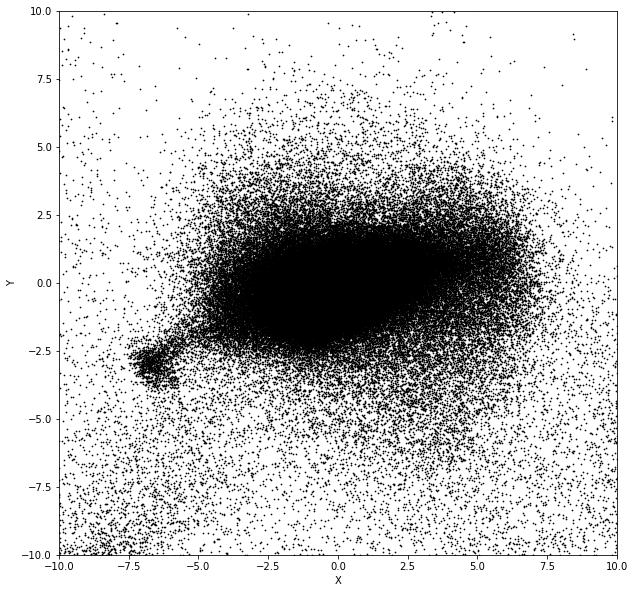

<Figure size 432x288 with 0 Axes>

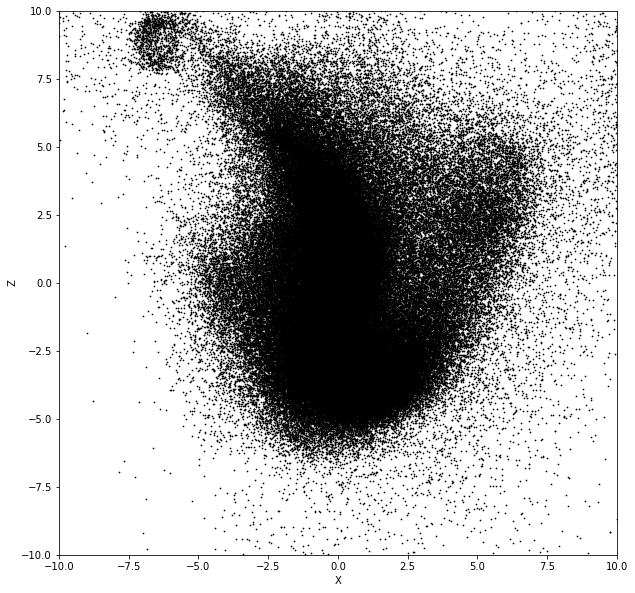

<Figure size 432x288 with 0 Axes>

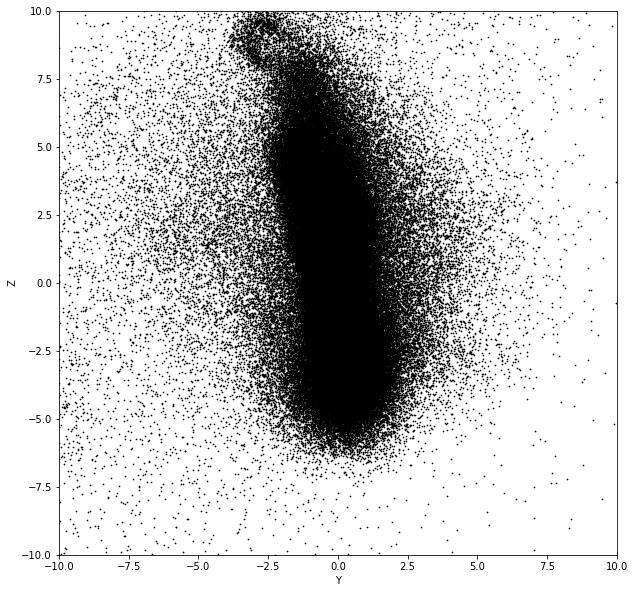

<Figure size 432x288 with 0 Axes>

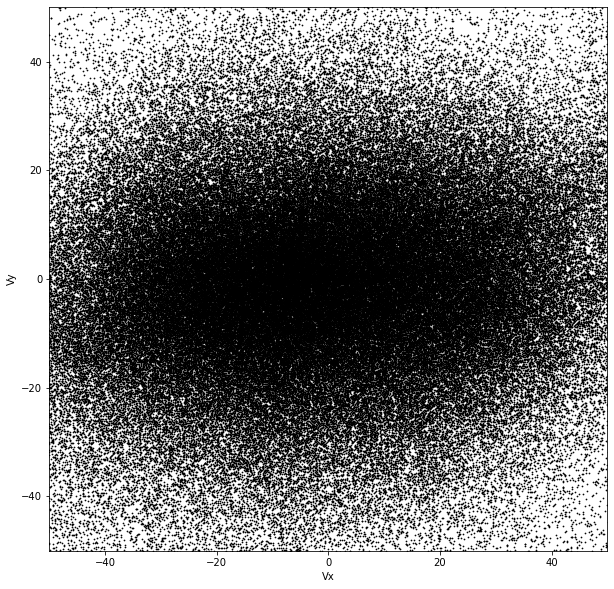

In [5]:
# Load in Model 2 data

smc2filebase = dir + 'Data/SMC_Model2/SMC_Stars' 

smc2age = np.loadtxt(smc2filebase + 'Age_Model2.txt')
smc2age.shape = (len(smc2age), 1)

smc2pos = np.loadtxt(smc2filebase + 'Pos_Model2_orig.txt')
smc2vel = np.loadtxt(smc2filebase + 'Vel_Model2_orig.txt')

smc2_orig = np.hstack((smc2age, smc2pos, smc2vel))

smc2 = Table(data=smc2_orig, names=['Age', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])

### now do the same for the gas particles

smc2gaspos = np.loadtxt(dir + "Data/SMC_Model2/SMC_Gas_Pos_Model2_orig.txt")
smc2gasvel = np.loadtxt(dir + "Data/SMC_Model2/SMC_Gas_Vel_Model2_orig.txt")

smc2gas_orig = np.hstack((smc2gaspos, smc2gasvel))
smc2gas = Table(data=smc2gas_orig, names=['X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


smc2dm_orig = np.loadtxt(dir + "Data/SMC_DM_Model2.txt")
smc2dm = Table(data=smc2dm_orig, names=['Mass', 'X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])

### 

smc2_center = np.asarray([5.5, -35.1, -39.2, -66.1680, -257.657, 197.569])

#smc2_diff = smc_center - smc2_center


smc2 = add_initial_columns(smc2, smc2_center, smc_center)

smc2gas = add_initial_columns(smc2gas, smc2_center, smc_center)

smc2dm = add_initial_columns(smc2dm, smc2_center, smc_center)

####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smc2['X_0'], smc2['Y_0'], s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smc2['X_0'], smc2['Z_0'], s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.show()


####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smc2['Y_0'], smc2['Z_0'], s=2, marker='.', color='black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('Y')
ax.set_ylabel('Z')
plt.show()


####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smc2['Vx_0'], smc2['Vy_0'], s=2, marker='.', color='black')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()


The different lengths are: 
233384 188640 16904


<Figure size 432x288 with 0 Axes>

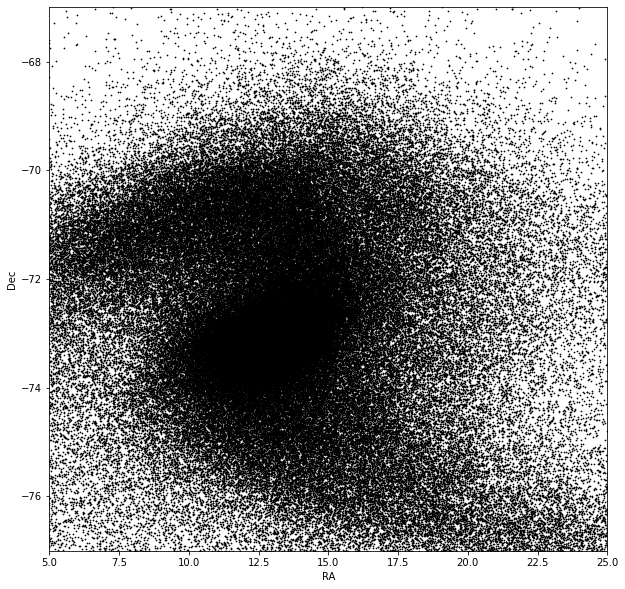

<Figure size 432x288 with 0 Axes>

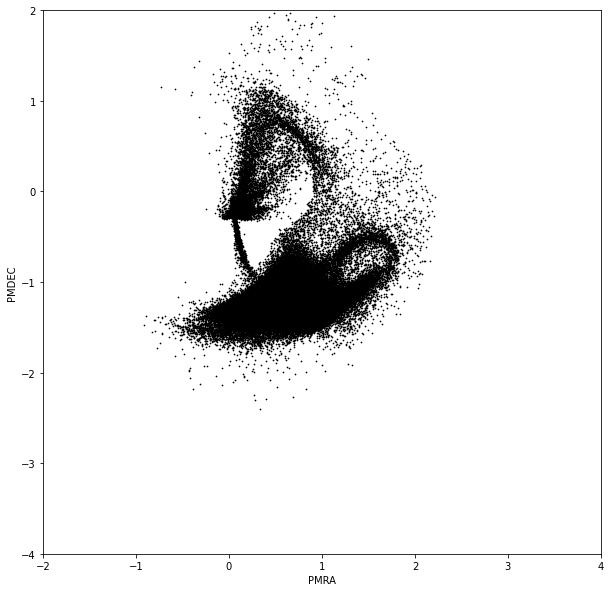

<Figure size 432x288 with 0 Axes>

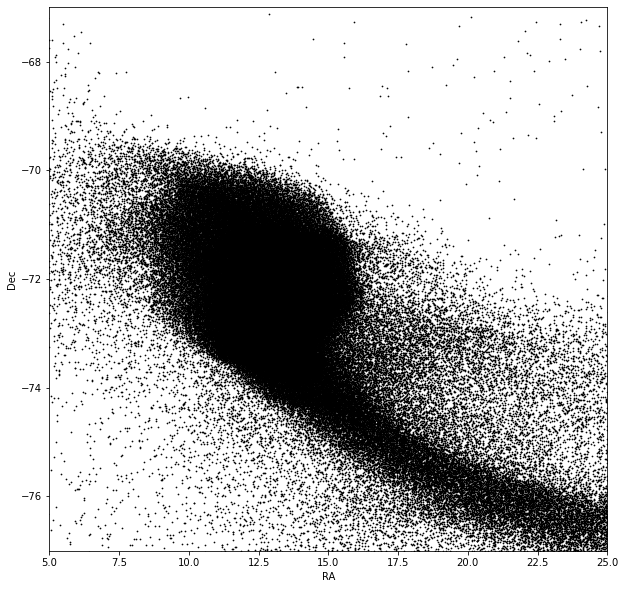

<Figure size 432x288 with 0 Axes>

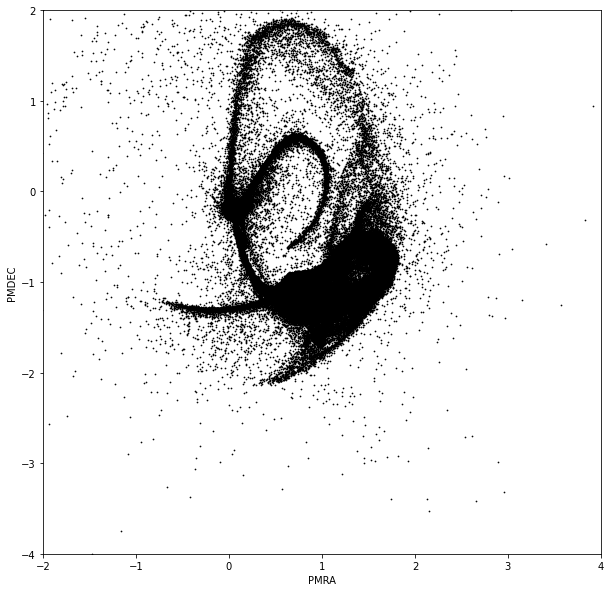

In [6]:
####

temp2a = coord.SkyCoord(x = smc2['X_G'] * u.kpc, y = smc2['Y_G'] * u.kpc, z = smc2['Z_G'] * u.kpc, \
                       v_x = smc2['Vx_G'] * u.km/u.s, v_y = smc2['Vy_G'] * u.km/u.s, \
                       v_z = smc2['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp2.transform_to(coord.ICRS))
temp2b = temp2a.transform_to(coord.ICRS)

smc2 = add_wcs_columns(smc2, temp2b)
    
smc2.write(dir + "Data/allstar_Model2.fits", overwrite=True)


smc2_old = smc2[(smc2['Age'] >= 1000.0)]

smc2_old.write(dir + "Data/allstar_Model2_old.fits", overwrite=True)


smc2_young = smc2[(smc2['Age'] < 250.)]

smc2_young.write(dir + "Data/allstar_Model2_young.fits", overwrite=True)


print("The different lengths are: ")
print(len(smc2), len(smc2_old), len(smc2_young))

#### now for the gas

temp2c = coord.SkyCoord(x = smc2gas['X_G'] * u.kpc, y = smc2gas['Y_G'] * u.kpc, z = smc2gas['Z_G'] * u.kpc, \
                       v_x = smc2gas['Vx_G'] * u.km/u.s, v_y = smc2gas['Vy_G'] * u.km/u.s, \
                       v_z = smc2gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp2.transform_to(coord.ICRS))
temp2d = temp2c.transform_to(coord.ICRS)

smc2gas = add_wcs_columns(smc2gas, temp2d)
    
smc2gas.write(dir + "Data/allstar_Model2_Gas.fits", overwrite=True)



### now do the same for the DM

temp2e = coord.SkyCoord(x = smc2dm['X_G'] * u.kpc, y = smc2dm['Y_G'] * u.kpc, z = smc2dm['Z_G'] * u.kpc, \
                       v_x = smc2dm['Vx_G'] * u.km/u.s, v_y = smc2dm['Vy_G'] * u.km/u.s, \
                       v_z = smc2dm['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp1.transform_to(coord.ICRS))
temp2f = temp2e.transform_to(coord.ICRS)

smc2dm = add_wcs_columns(smc2dm, temp2f)

smc2dm.write(dir + "Data/allstar_Model2_DM.fits", overwrite=True)


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2['RA'], smc2['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2['PMRA'], smc2['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2gas['RA'], smc2gas['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smc2gas['PMRA'], smc2gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()

<Figure size 432x288 with 0 Axes>

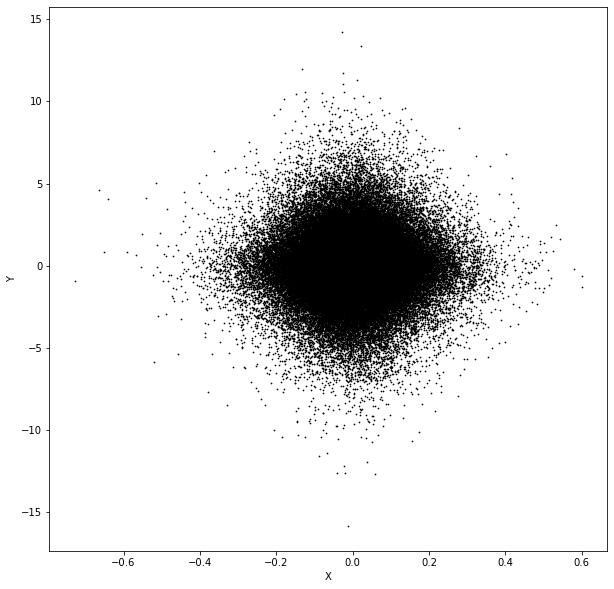

<Figure size 432x288 with 0 Axes>

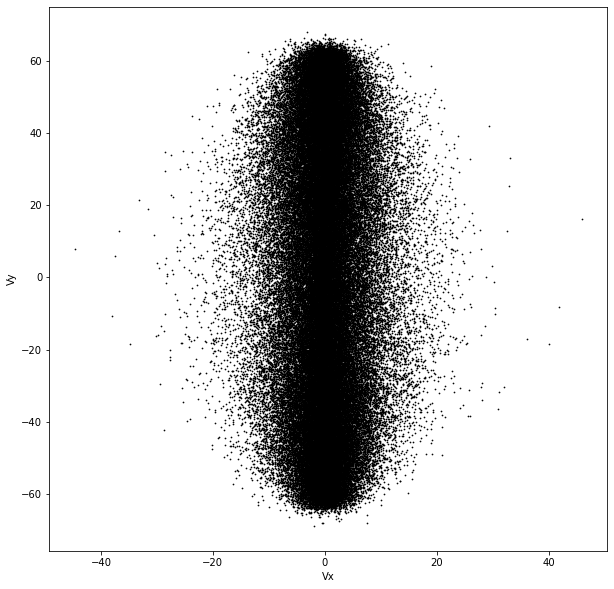

<Figure size 432x288 with 0 Axes>

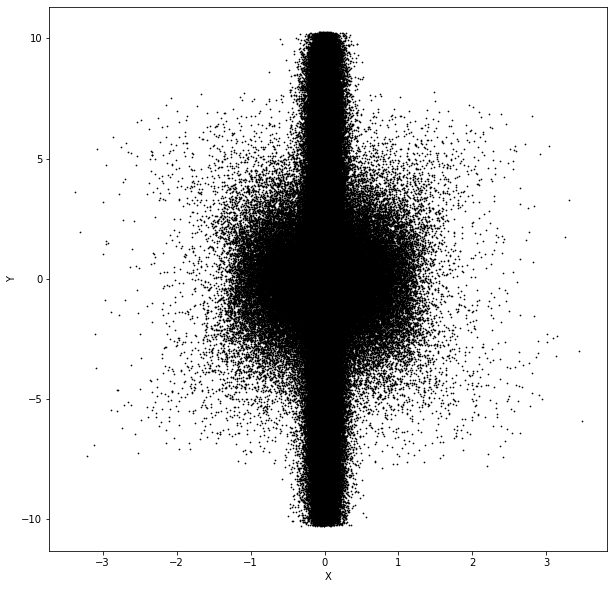

<Figure size 432x288 with 0 Axes>

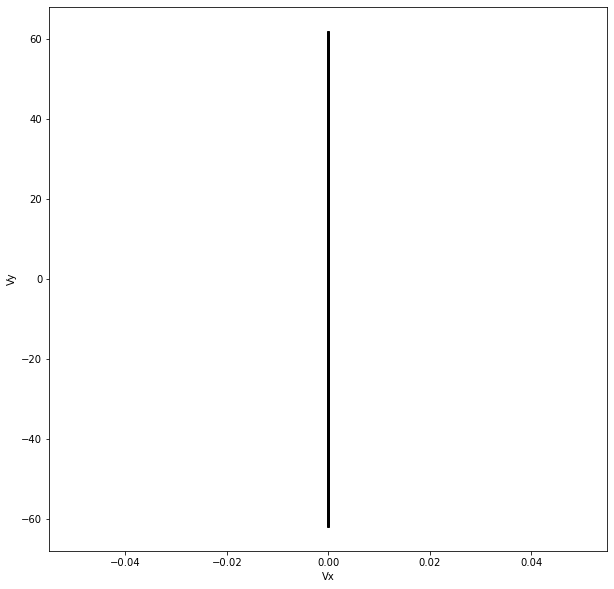

In [7]:
# Load in Isolated data

## Because of an issue with the centers, the isolated case will default to using median

smciso_filebase = dir + 'Data/SMC_Iso/SMC_Stars' 


smciso_pos = np.loadtxt(smciso_filebase + 'Pos_Iso.txt')
smciso_vel = np.loadtxt(smciso_filebase + 'Vel_Iso.txt')

smciso_orig = np.hstack((smciso_pos, smciso_vel))

smciso = Table(data=smciso_orig, names=['X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


smciso_gaspos = np.loadtxt(dir + "Data/SMC_Iso/SMC_Gas_Pos_Iso.txt")
smciso_gasvel = np.loadtxt(dir + "Data/SMC_Iso/SMC_Gas_Vel_Iso.txt")

smciso_gas_orig = np.hstack((smciso_gaspos, smciso_gasvel))
smciso_gas = Table(data=smciso_gas_orig, names=['X_sim', 'Y_sim', 'Z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])


smciso_center = np.asarray([np.median(smciso['X_sim']), np.median(smciso['Y_sim']), np.median(smciso['Z_sim']), \
                            np.median(smciso['Vx_sim']), np.median(smciso['Vy_sim']), np.median(smciso['Vz_sim'])])
x, y, z, vx, vy, vz = 0, 1, 2, 3, 4, 5

        
smciso = add_initial_columns(smciso, smciso_center, smc_center)




plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smciso['X_0'], smciso['Y_0'], s=2, marker='.', color='black')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smciso['Vx_0'], smciso['Vy_0'], s=2, marker='.', color='black')
#ax.set_xlim(-50, 50)
#ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()


####

smciso_gas_center = np.asarray([np.median(smciso_gas['X_sim']), np.median(smciso_gas['Y_sim']), \
                                np.median(smciso_gas['Z_sim']), np.median(smciso_gas['Vx_sim']), \
                                np.median(smciso_gas['Vy_sim']), np.median(smciso_gas['Vz_sim'])])


smciso_gas = add_initial_columns(smciso_gas, smciso_gas_center, smc_center)


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smciso_gas['X_0'], smciso_gas['Y_0'], s=2, marker='.', color='black')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(smciso_gas['Vx_0'], smciso_gas['Vy_0'], s=2, marker='.', color='black')
#ax.set_xlim(-50, 50)
#ax.set_ylim(-50, 50)
ax.set_xlabel("Vx")
ax.set_ylabel("Vy")
plt.show()

<Figure size 432x288 with 0 Axes>

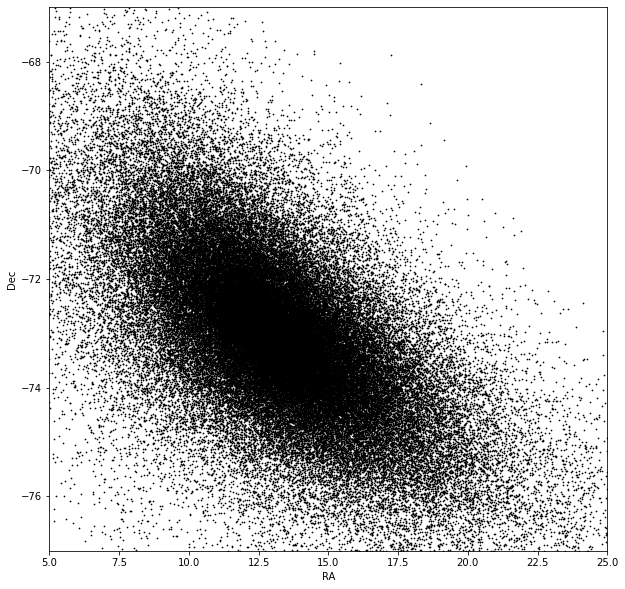

<Figure size 432x288 with 0 Axes>

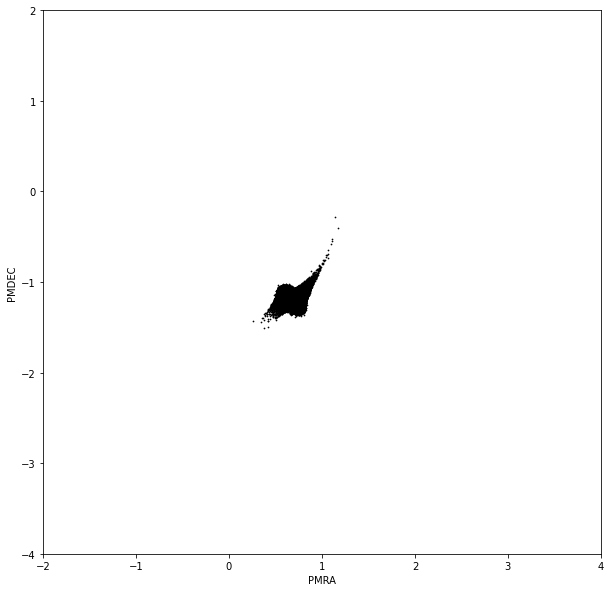

<Figure size 432x288 with 0 Axes>

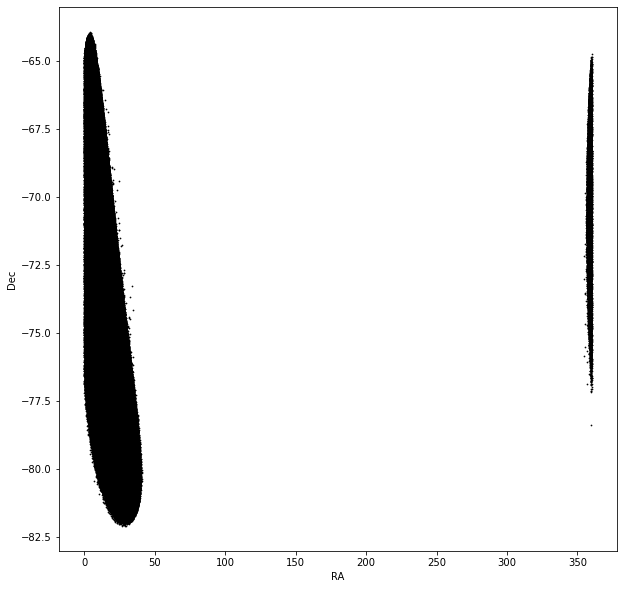

<Figure size 432x288 with 0 Axes>

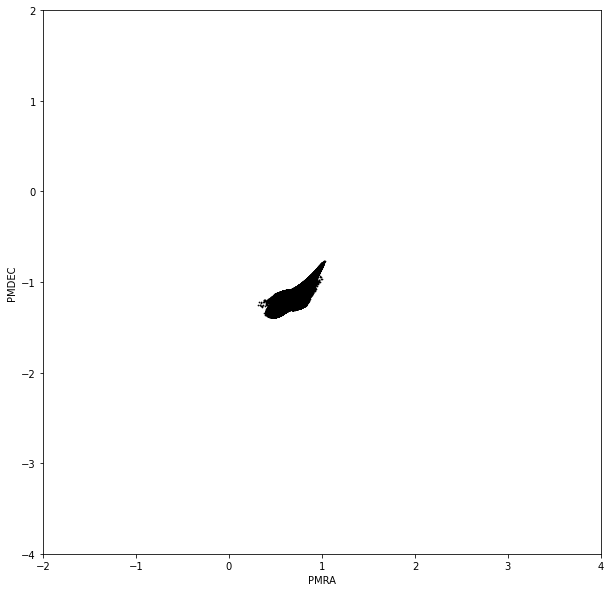

In [8]:
####

tempisoa = coord.SkyCoord(x = smciso['X_G'] * u.kpc, y = smciso['Y_G'] * u.kpc, z = smciso['Z_G'] * u.kpc, \
                       v_x = smciso['Vx_G'] * u.km/u.s, v_y = smciso['Vy_G'] * u.km/u.s, \
                       v_z = smciso['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp2.transform_to(coord.ICRS))
tempisob = tempisoa.transform_to(coord.ICRS)

smciso = add_wcs_columns(smciso, tempisob)
    
smciso.write(dir + "Data/allstar_ModelIso.fits", overwrite=True)


#### now for the gas

tempisoc = coord.SkyCoord(x = smciso_gas['X_G'] * u.kpc, y = smciso_gas['Y_G'] * u.kpc, z = smciso_gas['Z_G'] * u.kpc, \
                       v_x = smciso_gas['Vx_G'] * u.km/u.s, v_y = smciso_gas['Vy_G'] * u.km/u.s, \
                       v_z = smciso_gas['Vz_G'] * u.km/u.s, frame=coord.Galactocentric(galcen_distance=8.1*u.kpc))

#print(temp2.transform_to(coord.ICRS))
tempisod = tempisoc.transform_to(coord.ICRS)

smciso_gas = add_wcs_columns(smciso_gas, tempisod)
    
smciso_gas.write(dir + "Data/allstar_ModelIso_Gas.fits", overwrite=True)




plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smciso['RA'], smciso['DEC'], s=2, marker='.', color='black')
ax.set_xlim(5, 25)
ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smciso['PMRA'], smciso['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()


####

plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smciso_gas['RA'], smciso_gas['DEC'], s=2, marker='.', color='black')
#ax.set_xlim(5, 25)
#ax.set_ylim(-77, -67)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

plt.show()


plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(smciso_gas['PMRA'], smciso_gas['PMDEC'], s=2, marker='.', color='black')
ax.set_xlim(-2, 4)
ax.set_ylim(-4, 2)
ax.set_xlabel("PMRA")
ax.set_ylabel("PMDEC")
plt.show()